# Demetri Papamichalis
# ANA 630 - Microproject 1 - wk1

# 1. Import Libraries

In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib
matplotlib.matplotlib_fname()
import sympy as sp
import sys

# 1.1 Check my directory

In [89]:
# gives current path directory
from pathlib import Path
print(Path.cwd())

C:\Users\dpapa_fxbb8d0


# 1.2 Import data file set

In [90]:
# read text file into pandas DataFrame
df = pd.read_csv("C:\\Users\dpapa_fxbb8d0\ANA-500---AUG-2022\hessi.solar.flare.2002to2016.csv");
print(df)

           flare  start.date start.time      peak       end  duration.s  \
0        2021213  2002-02-12   21:29:56  21:33:38  21:41:48         712   
1        2021228  2002-02-12   21:44:08  21:45:06  21:48:56         288   
2        2021332  2002-02-13   00:53:24  00:54:54  00:57:00         216   
3        2021308  2002-02-13   04:22:52  04:23:50  04:26:56         244   
4        2021310  2002-02-13   07:03:52  07:05:14  07:07:48         236   
...          ...         ...        ...       ...       ...         ...   
113937  16122603  2016-12-26   22:09:20  22:17:02  22:17:24         484   
113938  16122604  2016-12-26   23:25:32  23:28:18  23:43:48        1096   
113939  16122701  2016-12-27   08:33:08  08:39:06  08:39:40         392   
113940  16122702  2016-12-27   12:21:24  12:21:30  12:30:04         520   
113941  16122703  2016-12-27   12:35:40  12:37:14  12:39:00         200   

        peak.c/s  total.counts energy.kev  x.pos.asec  y.pos.asec  radial  \
0            136      

In [91]:
df.shape

(113942, 18)

# 2. Prepare/Clean Data

In [92]:
# sort data:
df_sorted = df.sort_values(by=['duration.s','total.counts'])
print(df_sorted)

           flare  start.date start.time      peak       end  duration.s  \
98092   14102513  2014-10-25   03:30:40  03:30:42  03:30:48           8   
26481    4030589  2004-03-05   03:18:12  03:18:14  03:18:20           8   
66935   12051031  2012-05-10   07:26:00  07:26:06  07:26:08           8   
46492    7012930  2007-01-29   17:54:16  17:54:18  17:54:24           8   
101334  14122120  2014-12-21   06:43:04  06:43:10  06:43:12           8   
...          ...         ...        ...       ...       ...         ...   
35708    5011912  2005-01-19   09:28:56  10:22:34  10:39:36        4240   
42397    5120214  2005-12-02   10:33:12  10:34:42  11:45:20        4328   
42383    5120243  2005-12-02   02:33:28  02:51:38  03:46:24        4376   
45714    6120521  2006-12-05   10:30:32  10:39:38  11:44:24        4432   
29879    4071503  2004-07-15   01:12:04  01:40:34  02:26:08        4444   

        peak.c/s  total.counts energy.kev  x.pos.asec  y.pos.asec  radial  \
98092          1      

In [93]:
# Attributes list:
df_sorted.__dir__()

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex

In [94]:
df_sorted.head()

,flare,start.date,start.time,peak,end,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,flag.3,flag.4,flag.5
98092,14102513,2014-10-25,03:30:40,03:30:42,03:30:48,8,1,21,6-12,292,-364,467,0,A0,DF,P1,PE,Q2
26481,4030589,2004-03-05,03:18:12,03:18:14,03:18:20,8,1,37,3-6,0,0,0,0,A0,PS,NaN,NaN,NaN
66935,12051031,2012-05-10,07:26:00,07:26:06,07:26:08,8,1,48,3-6,0,0,0,0,A0,PE,PS,Q1,NaN
46492,7012930,2007-01-29,17:54:16,17:54:18,17:54:24,8,1,50,3-6,0,0,0,0,A0,PS,NaN,NaN,NaN
101334,14122120,2014-12-21,06:43:04,06:43:10,06:43:12,8,3,76,3-6,0,0,0,0,A0,DF,PE,PS,Q2


In [95]:
df_sorted.info;

In [96]:
# check tyes of variables:
df_sorted.dtypes

flare                int64
start.date          object
start.time          object
peak                object
end                 object
duration.s           int64
peak.c/s             int64
total.counts         int64
energy.kev          object
x.pos.asec           int64
y.pos.asec           int64
radial               int64
active.region.ar     int64
flag.1              object
flag.2              object
flag.3              object
flag.4              object
flag.5              object
dtype: object

In [97]:
# show variables/columns:
df_sorted.columns

Index(['flare', 'start.date', 'start.time', 'peak', 'end', 'duration.s',
       'peak.c/s', 'total.counts', 'energy.kev', 'x.pos.asec', 'y.pos.asec',
       'radial', 'active.region.ar', 'flag.1', 'flag.2', 'flag.3', 'flag.4',
       'flag.5'],
      dtype='object')

In [98]:
# Search for "Nan" elements in dataset:
df_sorted.isnull().values.any()

True

In [99]:
df_sorted[df_sorted.isnull().any(axis=1)]

,flare,start.date,start.time,peak,end,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,flag.3,flag.4,flag.5
26481,4030589,2004-03-05,03:18:12,03:18:14,03:18:20,8,1,37,3-6,0,0,0,0,A0,PS,NaN,NaN,NaN
66935,12051031,2012-05-10,07:26:00,07:26:06,07:26:08,8,1,48,3-6,0,0,0,0,A0,PE,PS,Q1,NaN
46492,7012930,2007-01-29,17:54:16,17:54:18,17:54:24,8,1,50,3-6,0,0,0,0,A0,PS,NaN,NaN,NaN
4771,20820130,2002-08-20,00:31:36,00:31:38,00:31:44,8,2,84,3-6,0,0,0,0,A0,PE,PS,Q1,NaN
66845,12050987,2012-05-09,09:13:04,09:13:06,09:13:12,8,3,104,3-6,0,0,0,0,A0,PE,PS,Q1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61140,11102244,2011-10-22,13:40:08,13:41:38,14:37:00,3412,464,2600540,6-12,-685,232,724,1325,A0,DR,P1,Q1,NaN
55633,11042704,2011-04-27,02:16:32,02:32:10,03:15:00,3508,720,4353360,12-25,-766,336,837,1201,A0,DR,P1,Q1,NaN
118,2022101,2002-02-21,23:56:36,00:06:42,00:57:16,3640,3568,20495088,12-25,391,-199,439,9830,A1,P1,NaN,NaN,NaN
28709,4052016,2004-05-20,00:46:48,01:09:34,01:50:04,3796,3568,19092168,12-25,-939,-172,954,618,A0,DR,P1,Q1,NaN


In [100]:
# find total number of missing values we have:
df_sorted.isnull().sum()

flare                   0
start.date              0
start.time              0
peak                    0
end                     0
duration.s              0
peak.c/s                0
total.counts            0
energy.kev              0
x.pos.asec              0
y.pos.asec              0
radial                  0
active.region.ar        0
flag.1                  0
flag.2                  0
flag.3              19907
flag.4              20202
flag.5              60951
dtype: int64

In [101]:
# Making a list of other missing value types
missing_values = ["n/a", "na", "--"]
df = pd.read_csv("hessi.solar.flare.2002to2016.csv", na_values = missing_values)

df.isnull().sum()

flare                   0
start.date              0
start.time              0
peak                    0
end                     0
duration.s              0
peak.c/s                0
total.counts            0
energy.kev              0
x.pos.asec              0
y.pos.asec              0
radial                  0
active.region.ar        0
flag.1                  0
flag.2                  0
flag.3              19907
flag.4              20202
flag.5              60951
dtype: int64

In [102]:
# Drop all rows with 'NaN' entries:
#df.dropna(inplace=True)
#print(df)


In [103]:
# Now, let's check if we have negative values in variables for out time and energy values
#(df_sorted<0).values.any()

In [104]:
# Check for duplicates:
df_sorted.duplicated()

98092     False
26481     False
66935     False
46492     False
101334    False
          ...  
35708     False
42397     False
42383     False
45714     False
29879     False
Length: 113942, dtype: bool

In [105]:
# reference by column nane:
df_sorted.loc[:, 'duration.s']
# or by index"
df.iloc[:, 6]

0         136
1           7
2          15
3          20
4         336
         ... 
113937    152
113938    304
113939     80
113940     24
113941     48
Name: peak.c/s, Length: 113942, dtype: int64

In [106]:
# Summary statistics:
df_sorted.describe()

,flare,duration.s,peak.c/s,total.counts,x.pos.asec,y.pos.asec,radial,active.region.ar
count,1.139420e+05,113942.000000,113942.000000,1.139420e+05,113942.000000,113942.000000,113942.000000,113942.000000
mean,1.086459e+07,493.051728,212.321532,3.772013e+05,-9.752181,-43.129812,689.528892,979.922926
std,9.832864e+06,433.389295,833.776871,3.071203e+06,757.017401,404.547666,513.203089,1350.484625
min,2.021213e+06,8.000000,0.000000,8.000000e+00,-10012.000000,-10005.000000,0.000000,0.000000
25%,4.110734e+06,212.000000,28.000000,2.292000e+04,-704.000000,-249.000000,469.000000,0.000000
50%,1.112022e+07,364.000000,53.000000,5.857400e+04,0.000000,-75.000000,759.000000,687.000000
75%,1.403013e+07,628.000000,144.000000,1.794420e+05,706.000000,198.000000,946.000000,1543.000000
max,1.412161e+08,4444.000000,113156.000000,4.355501e+08,1002.000000,1012.000000,14154.000000,9999.000000


# 3. Analyze Data

In [107]:
# extract 'duration' & 'total counts' column to plot later:
x = df.loc[:,'duration.s']
print(x)

0          712
1          288
2          216
3          244
4          236
          ... 
113937     484
113938    1096
113939     392
113940     520
113941     200
Name: duration.s, Length: 113942, dtype: int64


In [108]:
y = df.loc[:,'total.counts']
print(y)

0         167304
1           9504
2          11448
3          17400
4         313392
           ...  
113937     75328
113938    142048
113939     32344
113940     17336
113941     11056
Name: total.counts, Length: 113942, dtype: int64


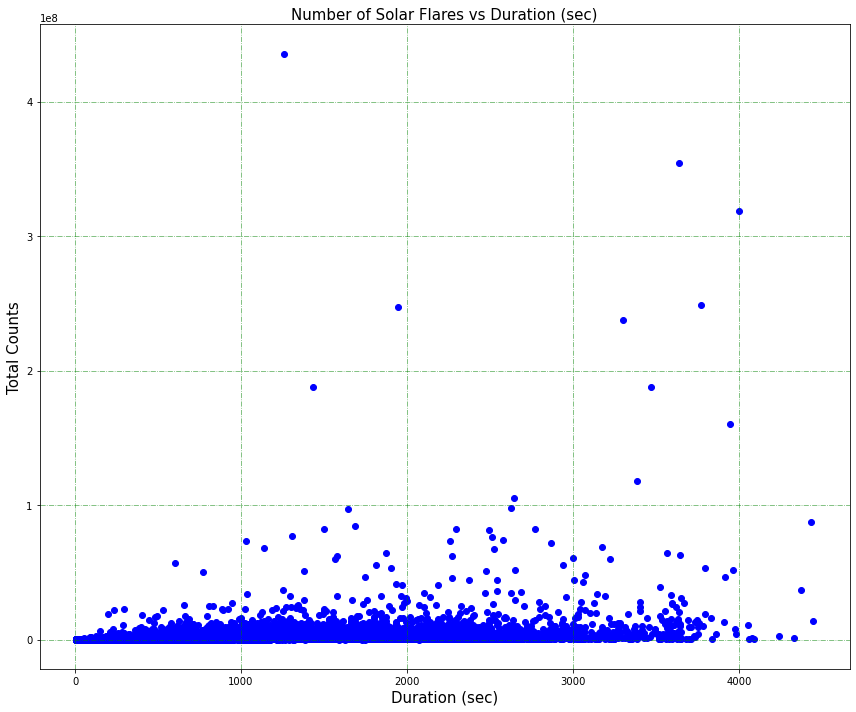

In [109]:
#plot of number of solar flares vs duration:
import matplotlib.pyplot as plt

plt.title("Number of Solar Flares vs Duration (sec)",fontsize=15)
plt.xlabel('Duration (sec)', fontsize=15)
plt.ylabel('Total Counts', fontsize=15)
# convert y-axis to Logarithmic scale
plt.scatter(x,y,color='blue')
plt.grid(color='green', alpha=0.6, linestyle='dashdot')
plt.rcParams["figure.figsize"] = (12,10)
plt.rcParams["figure.autolayout"] = True
plt.savefig('Counts vs Duration.jpeg', dpi=300, bbox_inches='tight')
plt.show()

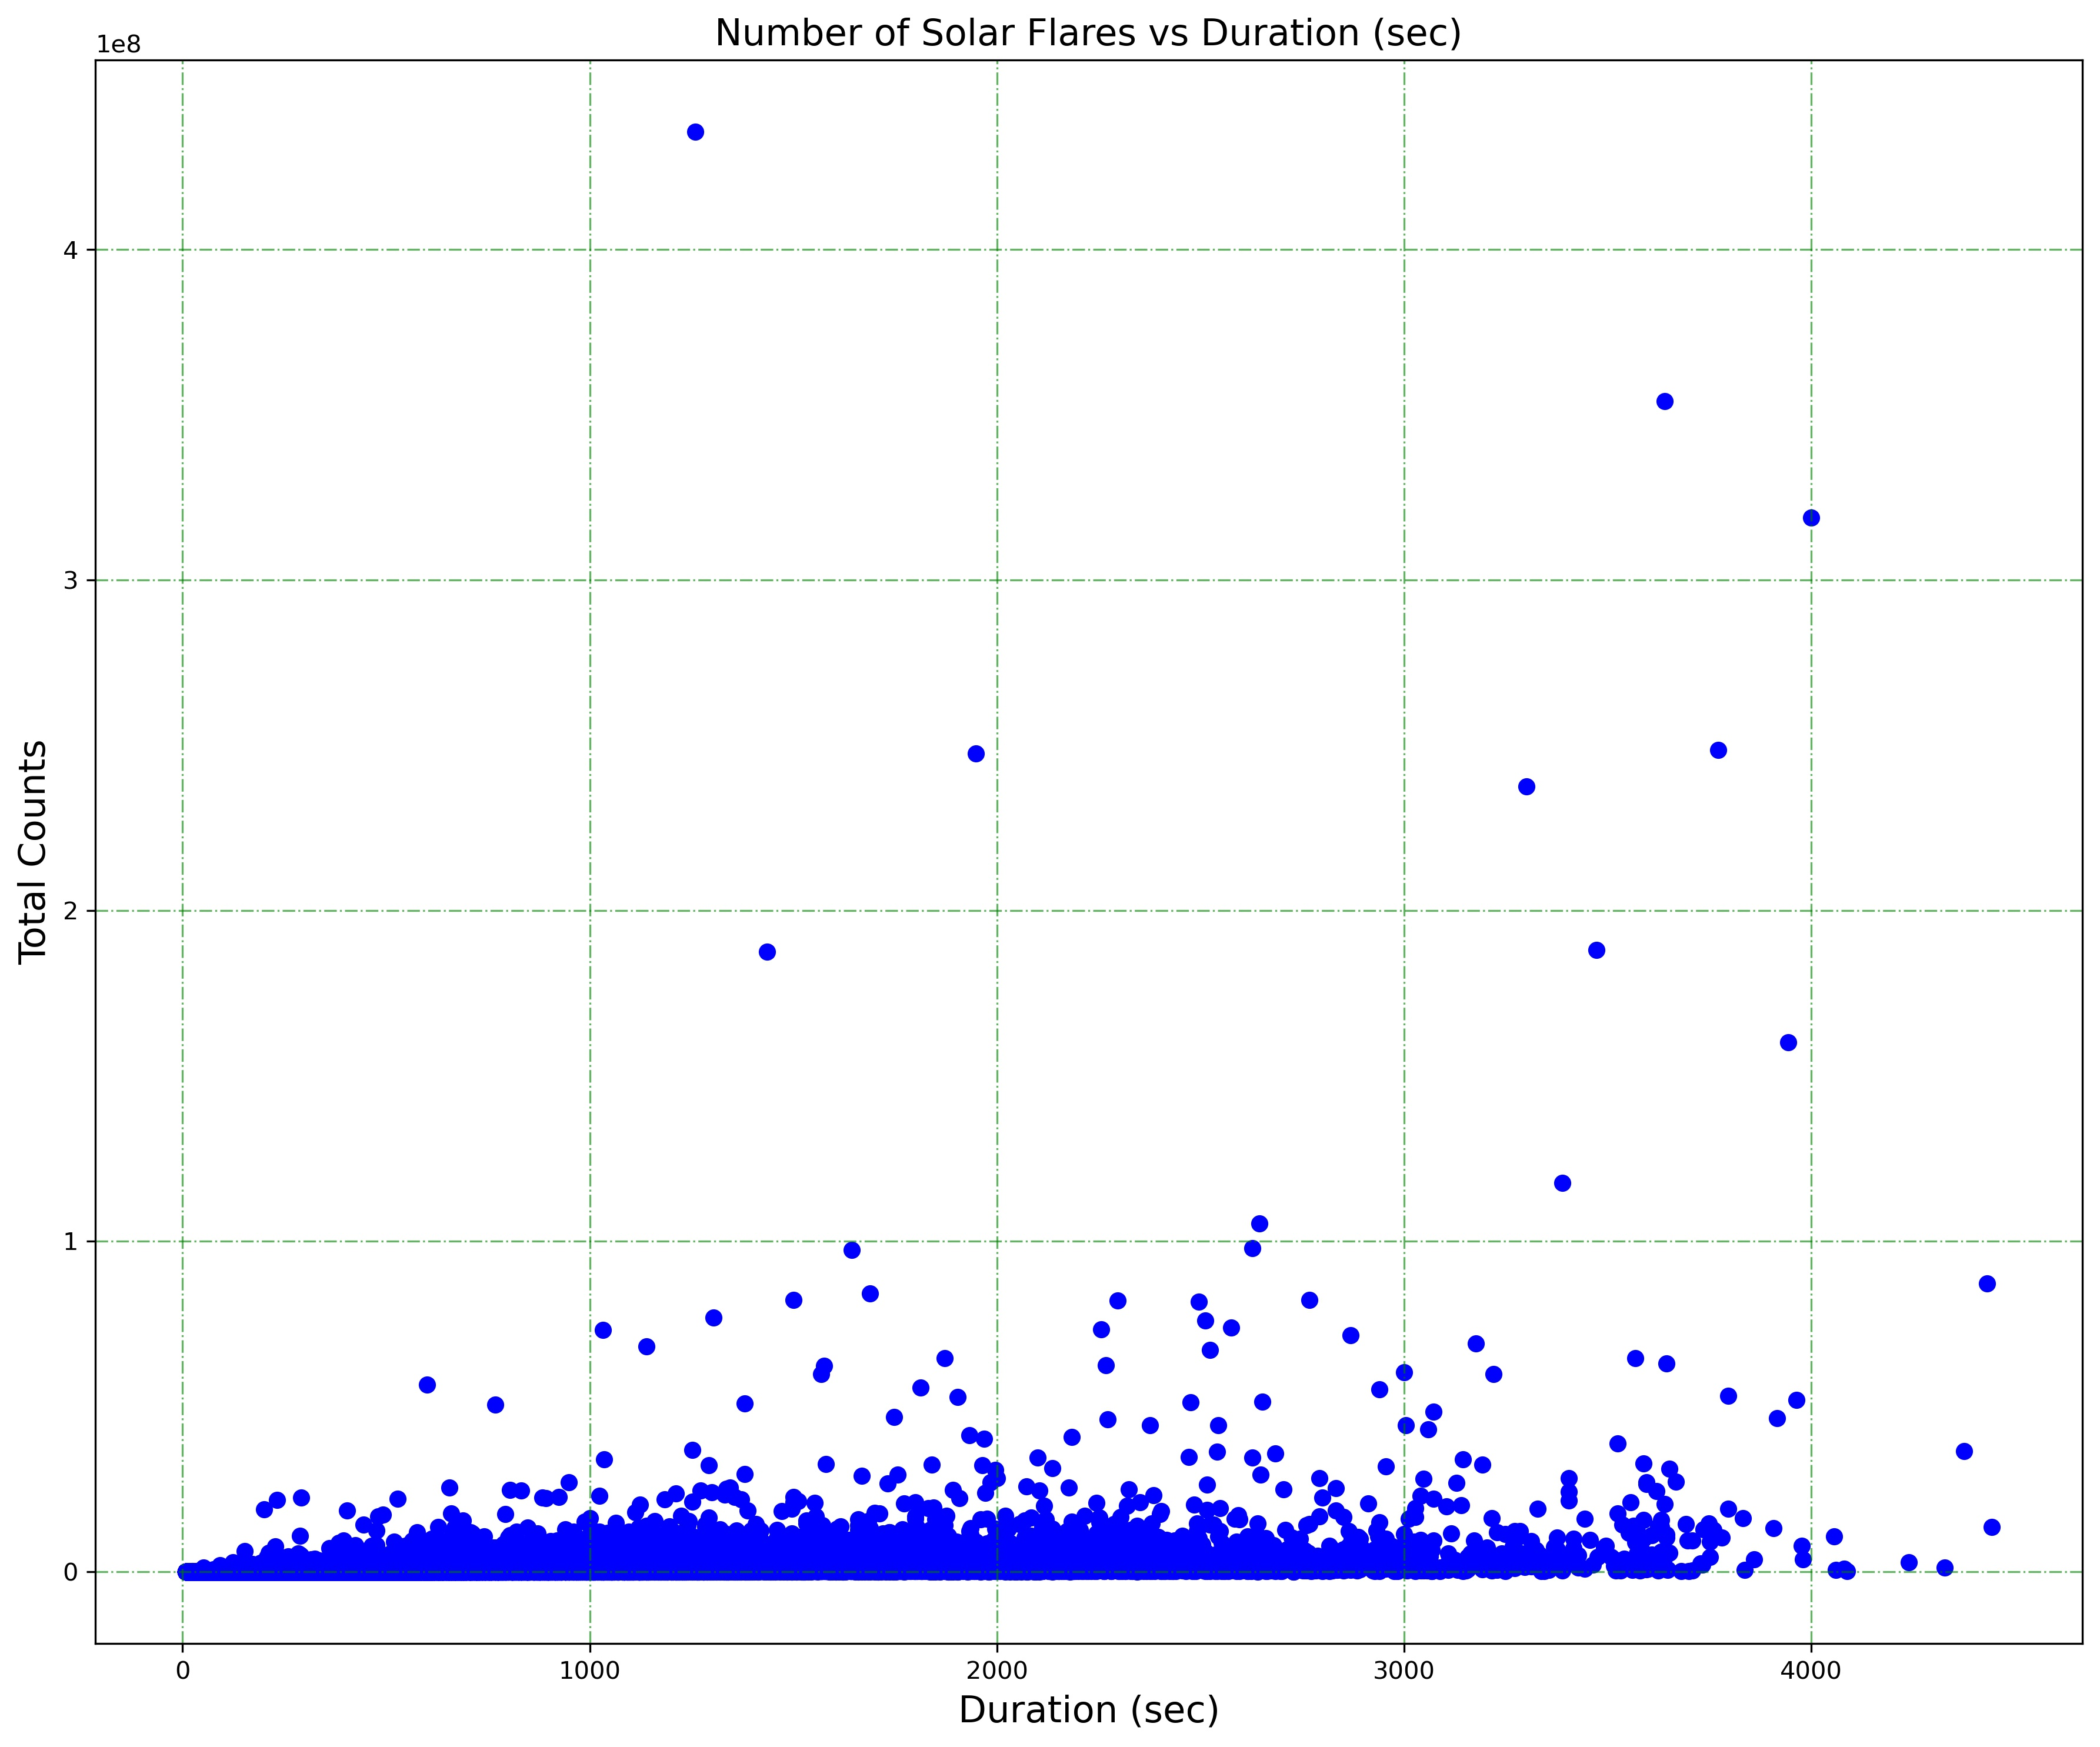

In [110]:
# check if figure was saved:
from IPython.display import Image
Image('Counts vs Duration.jpeg')

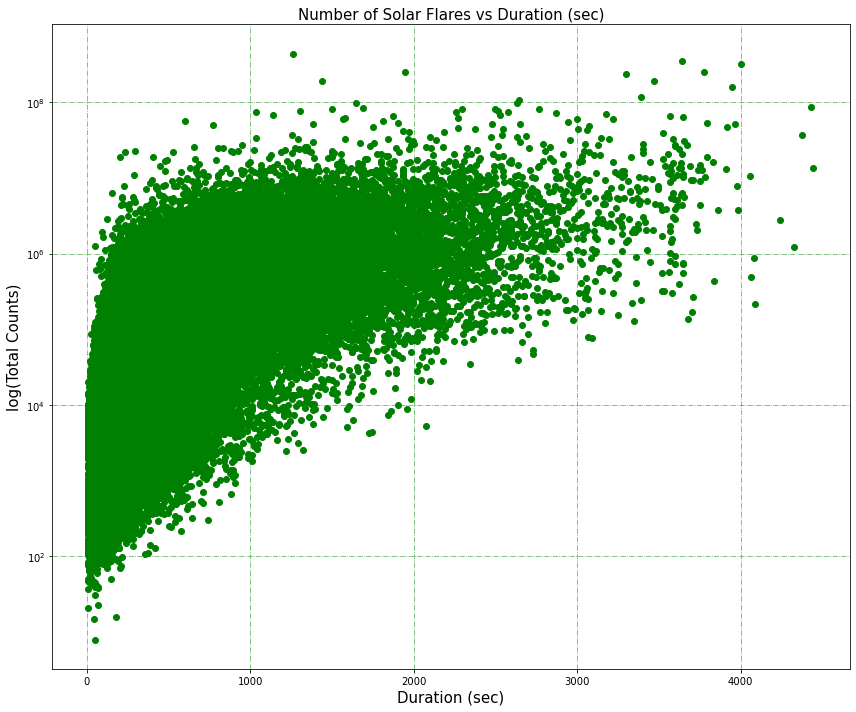

In [111]:
#plot of log(number of solar flares) vs duration:
import matplotlib.pyplot as plt

plt.title("Number of Solar Flares vs Duration (sec)",fontsize=15)
plt.xlabel('Duration (sec)', fontsize=15)
plt.ylabel('log(Total Counts)', fontsize=15)
# convert y-axis to Logarithmic scale
plt.yscale("log")
plt.scatter(x,y,color='green')
plt.grid(color='green', alpha=0.6, linestyle='dashdot')
plt.rcParams["figure.figsize"] = (12,10)
plt.rcParams["figure.autolayout"] = True
plt.savefig('log(Counts) vs Duration.jpeg', dpi=300, bbox_inches='tight')
plt.show()

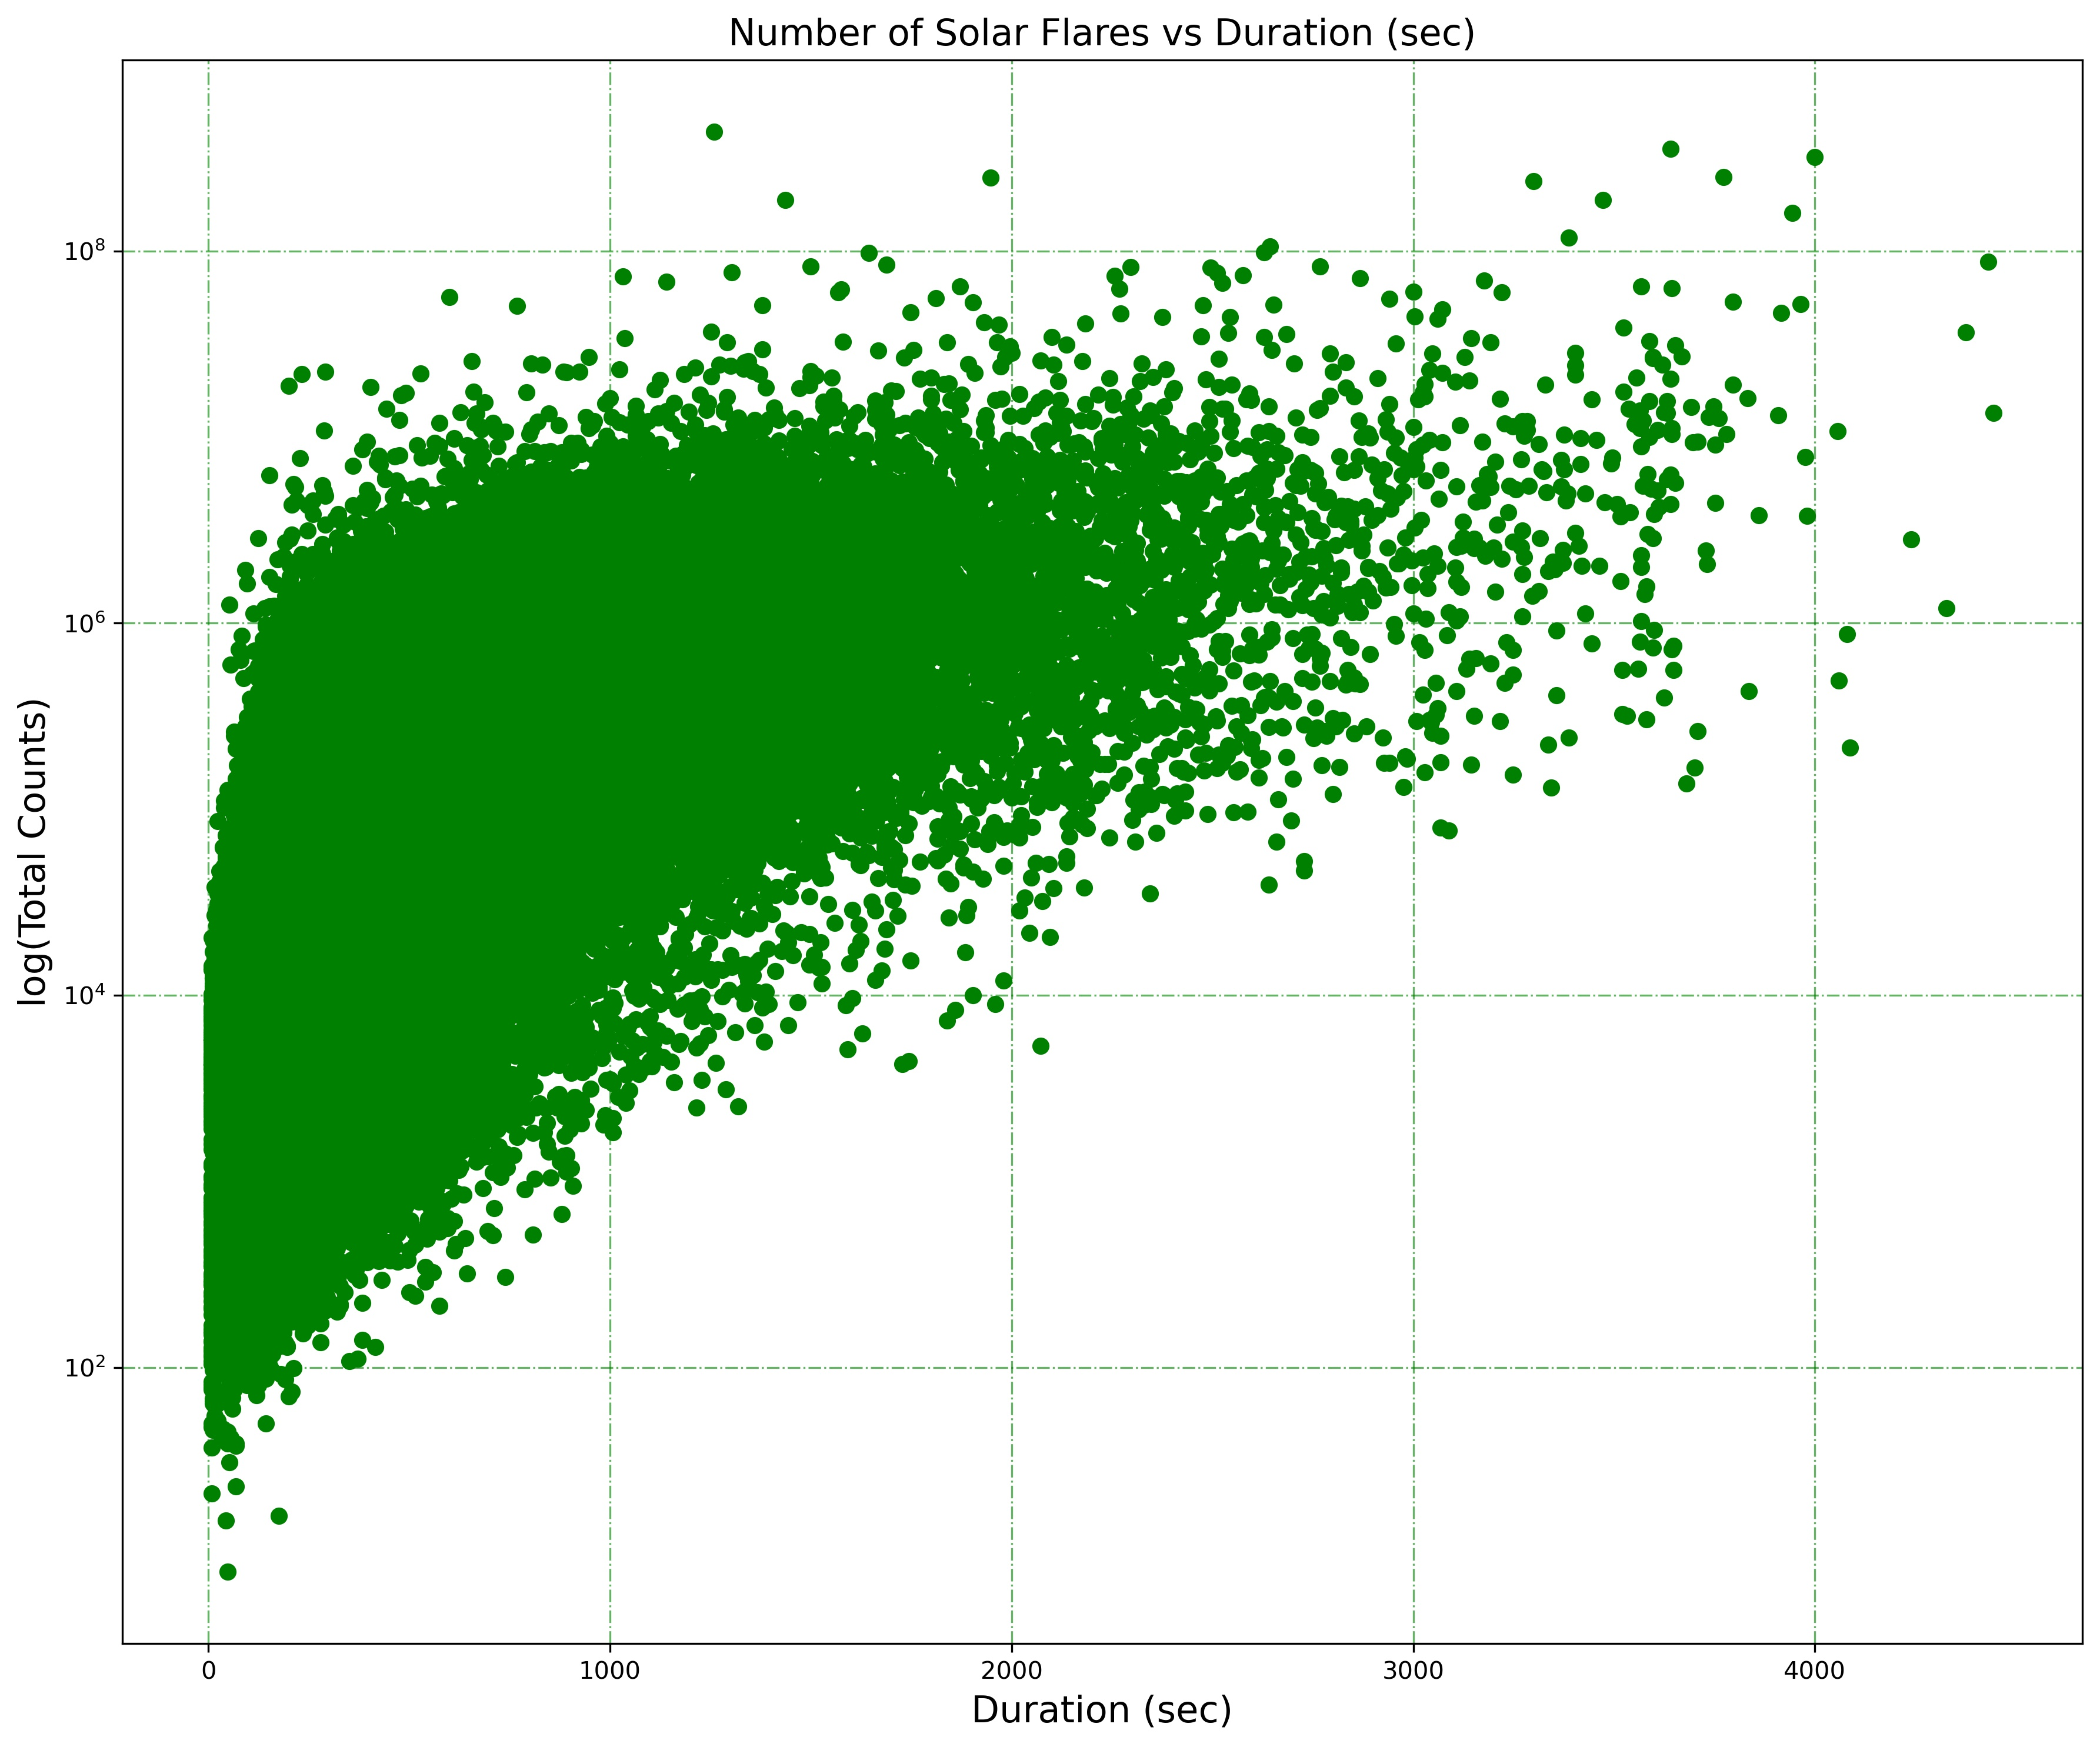

In [112]:
# check if figure was saved:
from IPython.display import Image
Image('log(Counts) vs Duration.jpeg')

In [113]:
# data to plot 1st histogram
histDATA = df_sorted.loc[:,['total.counts','energy.kev']]

In [114]:
# x-axis = energy
x = df_sorted.loc[:,'energy.kev']

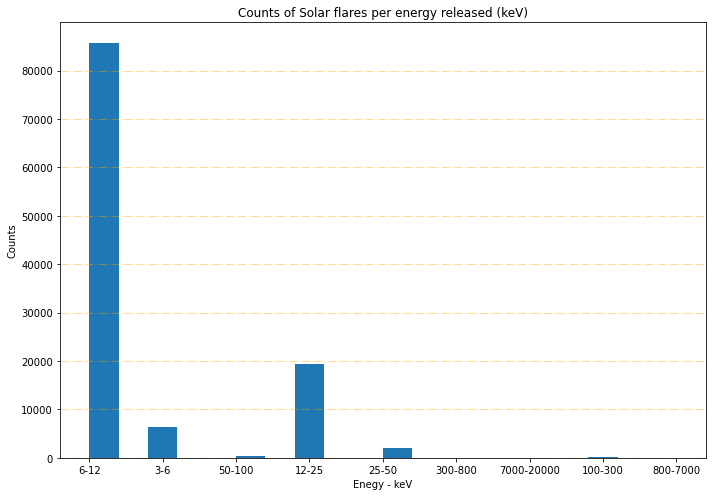

In [115]:
# Histogram of number of solar flares and energy released.
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
axs.hist(x, bins = 20)


plt.grid(axis='y', linestyle ='-.', linewidth = 1.2, color ='orange', alpha=0.4)
plt.xlabel('Enegy - keV')
plt.ylabel('Counts')
plt.title('Counts of Solar flares per energy released (keV)')
plt.show()

In [116]:
# data to plot 2nd histogram
histDATA2 = df_sorted.loc[:,['total.counts','duration.s']]

In [117]:
# x-axis = time/duration
x = df_sorted.loc[:,'duration.s']

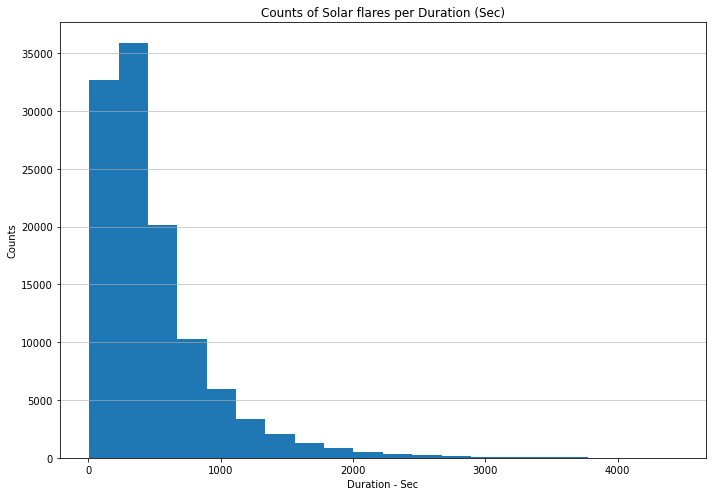

In [118]:
# Histogram of number of solar flares and duration in sec.
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
axs.hist(x, bins = 20)


plt.grid(axis='y', alpha=0.75)
plt.xlabel('Duration - Sec')
plt.ylabel('Counts')
plt.title('Counts of Solar flares per Duration (Sec)')
plt.show()